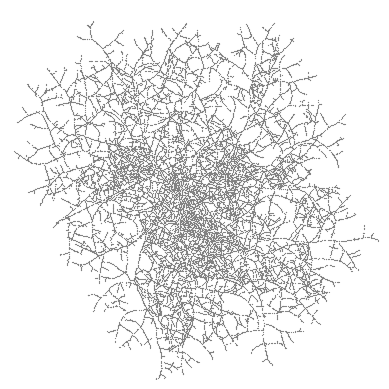

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import read_pickle

from inference import gph2xy, diam, nx_dist, l_tot, nb_apex

path = "./Data/M2"

filenames_ = os.listdir(path)
filenames = []

for file in filenames_ :
    if file[-7:] == 'gpickle':
        filenames += [file]

g = read_pickle(path + '/' + filenames[0])

def plot(g):
    """
    Plot the graph of the mycelium

    Args:
        g: a NetworkX graph
    """
    xs, ys = gph2xy(g)
    cx, cy = np.mean(xs), np.mean(ys)
    plt.axis("off")
    plt.axis("square")
    plt.axis([cx-2800, cx+2800, cy-2800, cy+2800])
    plt.scatter(xs, ys, s=3, c='0.5', marker='.', linewidth=0)
    plt.show()

plot(g)

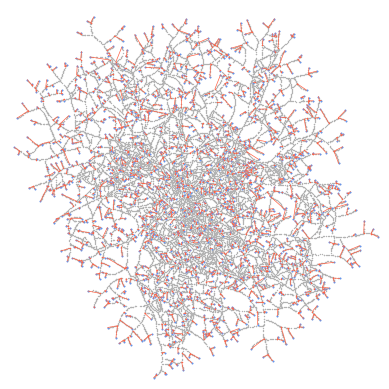

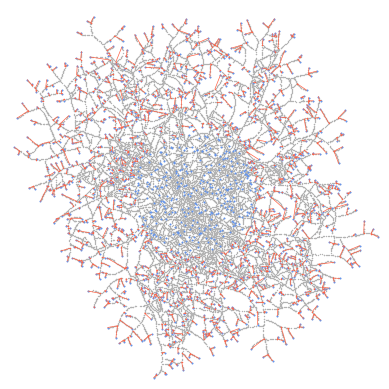

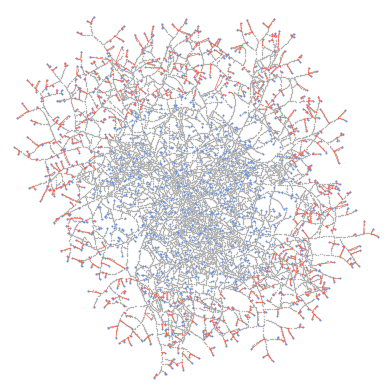

In [2]:
d = diam(g)
R = [0, 0.3, 0.5]

for r in R:
    nx_dist(g, min_diameter=d*r, plot=True, verbose=True)

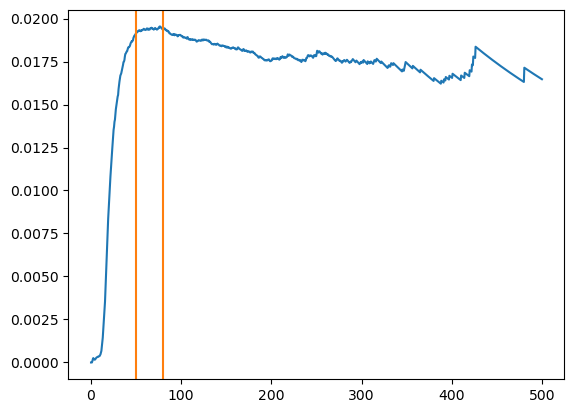

In [3]:
def F(data,x): 
    """
    Compute the empirical tail distribution in lengths of open segments
    
    Args:
        data (list): list[float] of lengths of open segments
        x (float)
    """
    return len([y for y in data if y > x])/len(data)

data = []

for file in filenames:
    g = read_pickle(path + '/' + file)
    d = diam(g)
    data += nx_dist(g, min_diameter=d*0, euclidean=False)
    
X = np.linspace(0.1, 500, 1000)
Y = [F(data, x) for x in X]
plt.plot(X, -np.log(Y)/X)
plt.axvline(x=50, color='C1')
plt.axvline(x=80, color='C1')

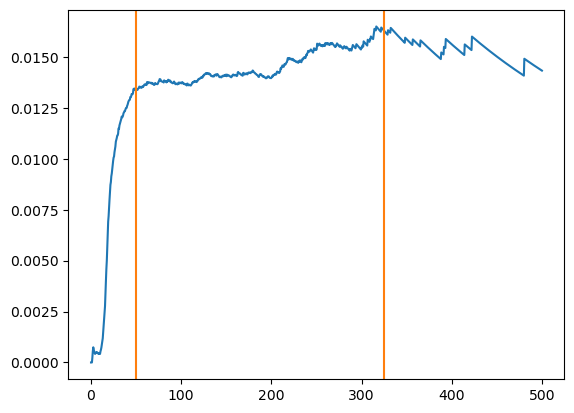

In [4]:
data = []

for file in filenames:
    g = read_pickle(path + '/' + file)
    d = diam(g)
    data += nx_dist(g, min_diameter=d*0.6, euclidean=False)
    
X = np.linspace(0.1, 500, 1000)
Y = [F(data, x) for x in X]
plt.plot(X, -np.log(Y)/X)
plt.axvline(x=50, color='C1')
plt.axvline(x=325, color='C1')

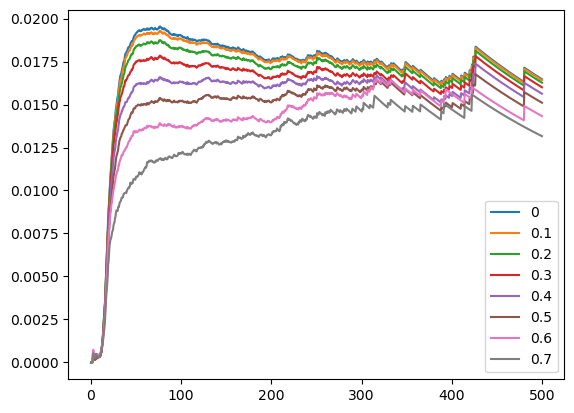

In [5]:
R = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]

for r in R : 
    data = [] 

    for file in filenames:
        g = read_pickle(path + '/' + file)
        d = diam(g)
        data += nx_dist(g, min_diameter=d*r, euclidean=False)
    X = np.linspace(0.1, 500, 1000)
    Y = [F(data, x) for x in X]
    plt.plot(X, -np.log(Y)/X, label=str(r))
    plt.legend()